## Q3) K-Means Clustering of MNIST

In [ ]:
#references
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds 

In [12]:
def sample_data(data):    #data --> an array of image matrices 
    plt.figure(figsize=(5,6))
    for i in range(30):
        plt.subplot(5,6,i+1)
        plt.imshow(data[i+150],cmap="gray")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()    
def accuracy(predicted_cluster_labels, majority_label, original_labels ):
    count=0
    for i in range(len(predicted_cluster_labels)):
        if majority_label[predicted_cluster_labels[i]]==original_labels[i]:
            count+=1
    return count/len(original_labels)
def Majority_Label(cluster_labels, original_labels, K):
    majority_label={}
    for i in range(K):
        original_label_count=[0]*K
        for j in range(len(original_labels)):
            if cluster_labels[j]==i:
                original_label=original_labels[j]
                original_label_count[original_label]=original_label_count[original_label]+1
        majority_label[i]=original_label_count.index(max(original_label_count))
    return majority_label

def low_rank_approximate(A,k=2):
    u, d, v = np.linalg.svd(A, full_matrices=0)
    A_k = np.zeros((len(u), len(v)))
    for i in range(k):
        A_k += d[i] * np.outer(u.T[i], v[i])
        #A_k+=np.reshape(u[:,i],(60))
    return A_k

trainset = MNIST(root='MNIST_TRAIN', train=True, download=False, transform=None)
testset = MNIST(root='MNIST_TEST', train=False, download=False, transform=None)

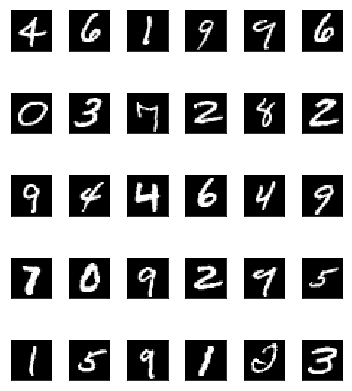

In [7]:
sample_data(trainset.train_data)   #samples from train set

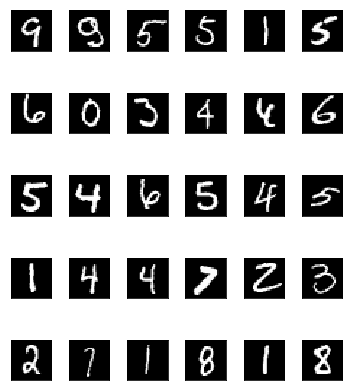

In [8]:
sample_data(testset.test_data)   #samples from test set

In [9]:
[X_train, X_test, y_train, y_test]=[trainset.train_data, testset.test_data, trainset.train_labels, testset.test_labels]
X_train_=[np.array(i.flatten()) for i in X_train]
X_test_=[np.array(i.flatten()) for i in X_test]
for i in [X_train_, X_test_, y_train, y_test]:
    tmp=i
    tmp=np.array(tmp)
    print(tmp.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [94]:
#KMeans clusterring
kmeans = KMeans(n_clusters=10, init='random').fit(X_train_)

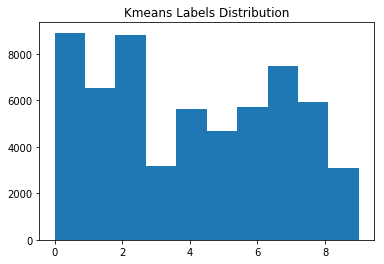

In [95]:
plt.hist(kmeans.labels_)
plt.title("Kmeans Labels Distribution")
plt.show()


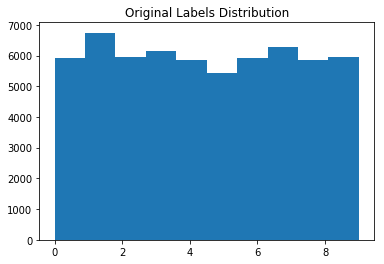

In [96]:
plt.title("Original Labels Distribution")
plt.hist(trainset.train_labels)
plt.show()


## Accuracy

In [97]:
majority_label=Majority_Label(kmeans.labels_, trainset.train_labels, 10)

predicted_cluster_labels=kmeans.predict(X_test_)
accuracy(predicted_cluster_labels, majority_label, testset.test_labels)

0.5943

Accuracy (Fraction of test images predicted with correct labels, no. of clusters= 10)

## 3b) Clustering with low rank approximation for different K's

In [13]:
k=[2,4,16,32]
for i in k:
    kmeans = KMeans(n_clusters=10, init='random').fit(low_rank_approximate(X_train_,i))
    majority_label=Majority_Label(kmeans.labels_, trainset.train_labels, 10)
    
    predicted_cluster_labels=kmeans.predict(X_test_)
    
    print("Accuracy for K = ", i, " :", accuracy(predicted_cluster_labels, majority_label, testset.test_labels))

Accuracy for K =  2  : 0.3276
Accuracy for K =  4  : 0.444
Accuracy for K =  16  : 0.5849
Accuracy for K =  32  : 0.5882
